# 0. Análisis Preliminares

## 0.1. Carga de librerías

Se instalan y cargan las librerías necesarias para el desarrollo.

In [1]:
!pip uninstall scikit-learn
!pip install scikit-learn==0.23.2
#!pip install markupsafe==2.1.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 8.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [2]:
!pip install pyvis
#!pip install scikit-learn ==0.23.2
!pip install pycaret==2.3.10
!pip install markupsafe==2.0.1
!pip install shap
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=7a6f554baa1b09c4bc59108c6e53a69d62e73e72b72783d6e2b3b6c2095561dd
  Stored in directory: /root/.cache/pip/wheels/2a/8f/04/6340d46afc74f59cc857a594ca1a2a14a1f4cbd4fd6c2e9306
Successfully built pyvis
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 7.6 MB/s 
     |████████████████████████████████| 167 kB 47.3 MB/s 
     |████████████████████████████████| 88 kB 6.3 MB/s 
     |████████████████████████████████| 134 kB 52.1 MB/s 
     |████████████████████████████████| 1.3 MB 9.1 MB/s 
     |████████████████████████████████| 3.3 MB 41.2 MB/s 
     |████████████████████████████████| 1.7 MB 46.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencie

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 10.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 8.5 MB/s 
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import jinja2
import pylab as pl
import pickle
from pycaret.classification import *
import joblib
import shap
import warnings
warnings.filterwarnings("ignore")

Leemos los datos desde github.

In [4]:
datos = pd.read_csv('https://raw.githubusercontent.com/LimaAnalytica/reto-latam/master/dataset_SCL.csv')
datos.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    Miami  
2  Santiago    Miami  
3  Santiago    Miami  
4  Santiago    Miami

In [5]:
print('La cantidad de filas del dataset es:',datos.shape[0],'\nLa cantidad de columnas del dataset es:',datos.shape[1])

La cantidad de filas del dataset es: 68206 
La cantidad de columnas del dataset es: 18


## 0.2. Análisis de calidad de datos

### 0.2.1. Tipos de variables

Se revisan los tipos de variables cargadas. Python detecta automáticamente el tipo de dato.

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB




---


>Se observa que:
>
>*   Todas las variables tienen los datos completos, salvo la variable `Vlo-O`, que tiene 1 dato perdido.
>*   Las variables `DIA`, `MES` y `AÑO`, al se cargaron como int64.
>*   El resto de variables han sido cargadas como `object`.´
>*   Hay dos variables del tipo fecha: `Fecha-I` y `Fecha-O`.


---



Observamos que las posibles variables numéricas son `DIA`, `MES`, `AÑO`, `Vlo-I` y `Vlo-O`, pero solo éstas últimas dos no se cargaron como numéricas, posiblemente porque contienen caracteres alfabéticos.

Para verificarlo, se usará un bucle que identifique las variables que contengan algún valor con algún caracter del alfabeto; es decir, que no sea completamente numérico.

In [7]:
print('Las variables que contienen caracteres alfabéticos son:')
for i in datos.columns:
  if (~datos[i].astype(str).str.isdigit()).sum()>0:
    print(' ',i)

Las variables que contienen caracteres alfabéticos son:
  Fecha-I
  Vlo-I
  Ori-I
  Des-I
  Emp-I
  Fecha-O
  Vlo-O
  Ori-O
  Des-O
  Emp-O
  DIANOM
  TIPOVUELO
  OPERA
  SIGLAORI
  SIGLADES


Tal como se observa, las variables `Vlo-I` y `Vlo-O` no son completamente numéricas, por lo que contienen valores con caracteres alfabéticos. Estos son:

*   Para el caso de `Vlo-I` 

In [8]:
datos[(~datos['Vlo-I'].astype(str).str.isdigit())]['Vlo-I']

22232     989P
27464     940P
39225     591P
39266     846A
58126    1104A
Name: Vlo-I, dtype: object

*   Para el caso de `Vlo-O` 

In [9]:
datos[(datos['Vlo-O'].astype(str).str.contains('[A-Z]'))]['Vlo-O']

13906     71R
13907     71R
17055    201R
19207     71R
22167     43R
22301    401A
22302    401B
24304    802R
27246    114R
27247    622R
32196    492R
38150    338R
39225    591P
44939    846A
55354    502R
61426    207R
Name: Vlo-O, dtype: object

Corregimos el tipo de datos de ambas variables.

In [10]:
# Corregimos la variable 'Vlo-I'
datos['Vlo-I'] = datos['Vlo-I'].astype(str)

# Corregimos la variable 'Vlo-O'
datos['Vlo-O-2'] = datos['Vlo-O'].apply(pd.to_numeric,downcast='integer',errors='coerce').astype('Int64')
datos['Vlo-O_Mod'] = np.where(datos['Vlo-O-2'].isna(),datos['Vlo-O'],datos['Vlo-O-2'])
datos['Vlo-O_Mod'] = datos['Vlo-O_Mod'].astype(str)

Luego, se da el formato de fecha a las variables del tipo fecha.

In [11]:
datos['Fecha-I'] = pd.to_datetime(datos['Fecha-I'],format="%Y-%m-%d %H:%M:%S")
datos['Fecha-O'] = pd.to_datetime(datos['Fecha-O'],format="%Y-%m-%d %H:%M:%S")

Verificamos la ventana de tiempo del dataset.

In [12]:
print('Los datos comprenden desde',datos['Fecha-I'].min(),'hasta',datos['Fecha-I'].max())

Los datos comprenden desde 2017-01-01 00:15:00 hasta 2017-12-31 23:55:00


In [13]:
print('Es decir:',datos['Fecha-I'].max()-datos['Fecha-I'].min())

Es decir: 364 days 23:40:00


### 0.2.2. Valores perdidos

Se verifica el dato nulo en la columna `Vlo-O`.

In [14]:
datos[datos['Vlo-O'].isna()]

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O  \
6068 2017-01-19 11:00:00   200  SCEL  SPJC   LAW 2017-01-19 11:03:00   NaN   

     Ori-O Des-O Emp-O  DIA  MES   AÑO  DIANOM TIPOVUELO  \
6068  SCEL  SPJC   56R   19    1  2017  Jueves         I   

                     OPERA  SIGLAORI SIGLADES  Vlo-O-2 Vlo-O_Mod  
6068  Latin American Wings  Santiago     Lima     <NA>       nan

Es fácil darse cuenta de que el valor de la variable número de vuelo programado (`Vlo-I`) está estrechamente relacionada con la variable número de vuelo de operación de vuelos (`Vlo-O`). Suelen tener el mismo valor.

Creamos una tabla y verificamos los valores de ambas variables. Se verifica que siempre se corresponden el mismo valor.

In [15]:
grafo_num_vuelo = datos.groupby(['Vlo-I','Vlo-O_Mod']).size().reset_index(name='Frecuencia')
grafo_num_vuelo

Vlo-I Vlo-O_Mod  Frecuencia
0       1         1         407
1      10        10          39
2     100       100          20
3    1003      1003           3
4    1004      1004           1
..    ...       ...         ...
647    99        99          17
648   991       991           9
649   993       993           3
650  9955      9955           1
651  9956      9956           1

[652 rows x 3 columns]

Ahora, revisamos específicamente el valor de `Vlo-I = 200` que corresponde a la observación con `Vlo-O = NaN`. 

In [16]:
grafo_num_vuelo[grafo_num_vuelo['Vlo-I']==200]

Empty DataFrame
Columns: [Vlo-I, Vlo-O_Mod, Frecuencia]
Index: []

Se observa claramente ambas variables se corresponden en el valor 200.

Esto sucede en casi todos los casos. Para revisar esto se construyen grafos, en los cuales se observa este comportamiento

In [17]:
import networkx as nx
from pyvis.network import Network
from IPython.core.display import display, HTML

plt.figure(figsize=(20,14))

G = nx.from_pandas_edgelist(grafo_num_vuelo,source = 'Vlo-I',target='Vlo-O_Mod',edge_attr='Frecuencia')

net = Network(notebook=True)
net.from_nx(G)
net.show('grafo_numero_vuelos.html')
display(HTML('grafo_numero_vuelos.html'))

<Figure size 1440x1008 with 0 Axes>

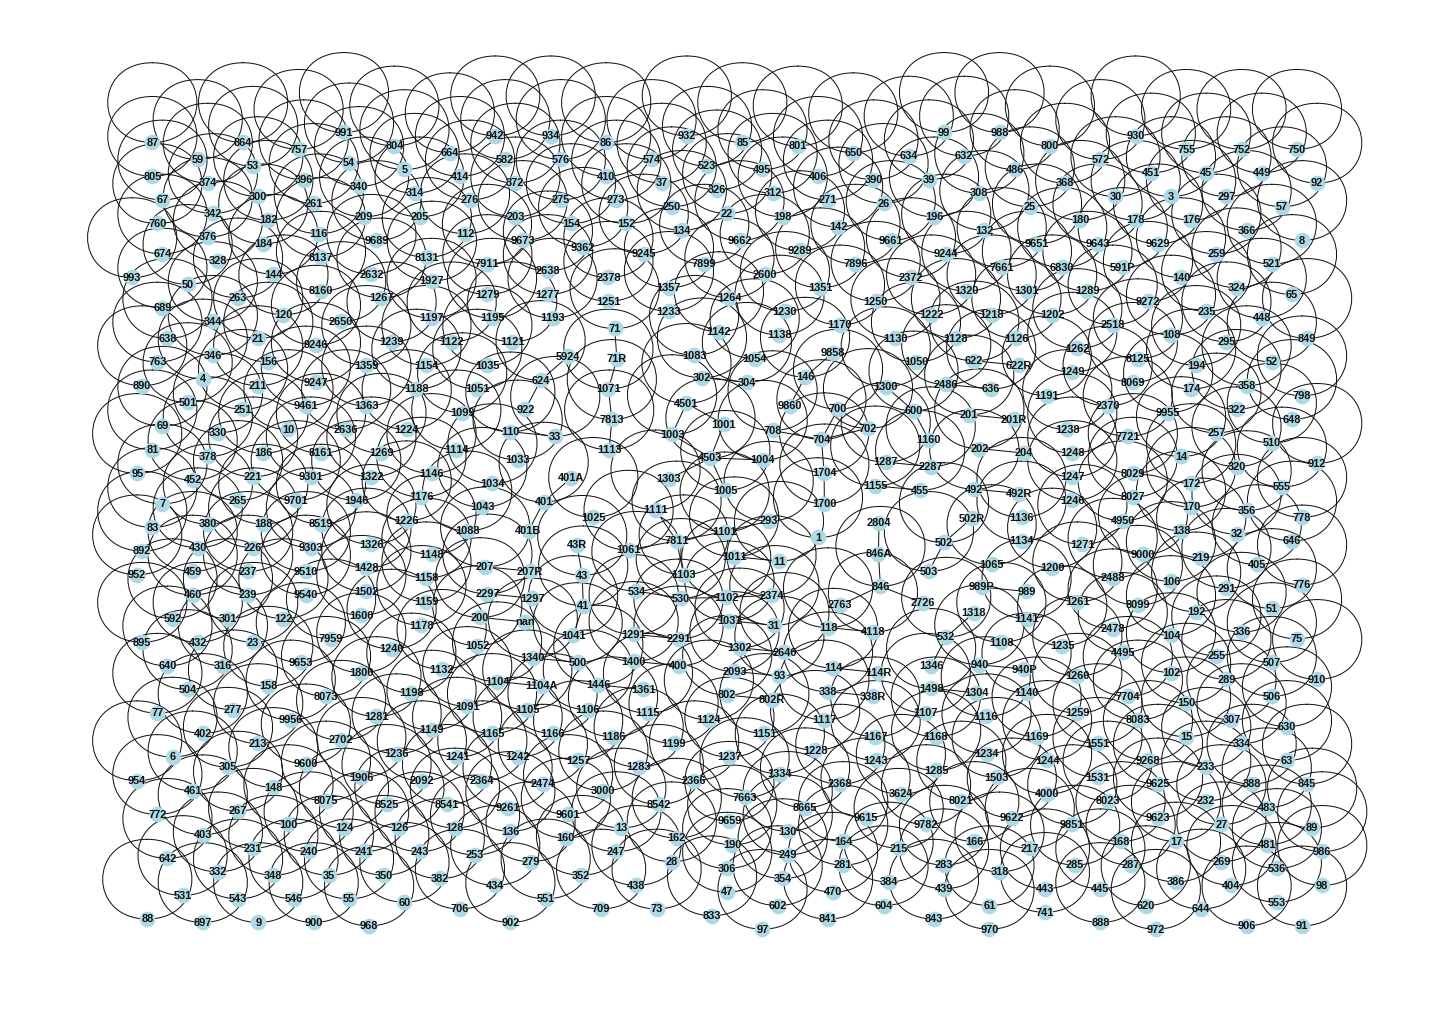

In [18]:
plt.figure(figsize=(20,14))

nx.draw(G, pos = nx.nx_pydot.graphviz_layout(G), \
    node_size=200, node_color='lightblue', linewidths=1.5, \
    font_size=11, font_weight='bold', with_labels=True)

Finalmente, usamos el criterio de imputación basado en esa correspondencia de valores entre las dos variables.

In [19]:
datos.loc[datos[datos['Vlo-O'].isna()].index,'Vlo-O'] = 200
datos.loc[datos['Vlo-O_Mod']=='nan','Vlo-O_Mod'] = 200

Verificamos que no tenemos ningún NA

In [20]:
datos[datos['Vlo-O'].isna()]

Empty DataFrame
Columns: [Fecha-I, Vlo-I, Ori-I, Des-I, Emp-I, Fecha-O, Vlo-O, Ori-O, Des-O, Emp-O, DIA, MES, AÑO, DIANOM, TIPOVUELO, OPERA, SIGLAORI, SIGLADES, Vlo-O-2, Vlo-O_Mod]
Index: []

In [21]:
datos[datos['Vlo-O_Mod']=='nan']

Empty DataFrame
Columns: [Fecha-I, Vlo-I, Ori-I, Des-I, Emp-I, Fecha-O, Vlo-O, Ori-O, Des-O, Emp-O, DIA, MES, AÑO, DIANOM, TIPOVUELO, OPERA, SIGLAORI, SIGLADES, Vlo-O-2, Vlo-O_Mod]
Index: []

# 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Para observar la distribución de las variables usaremos un gráfico de barras, dado que las variables son cualitativas y las numéricas son discretas.

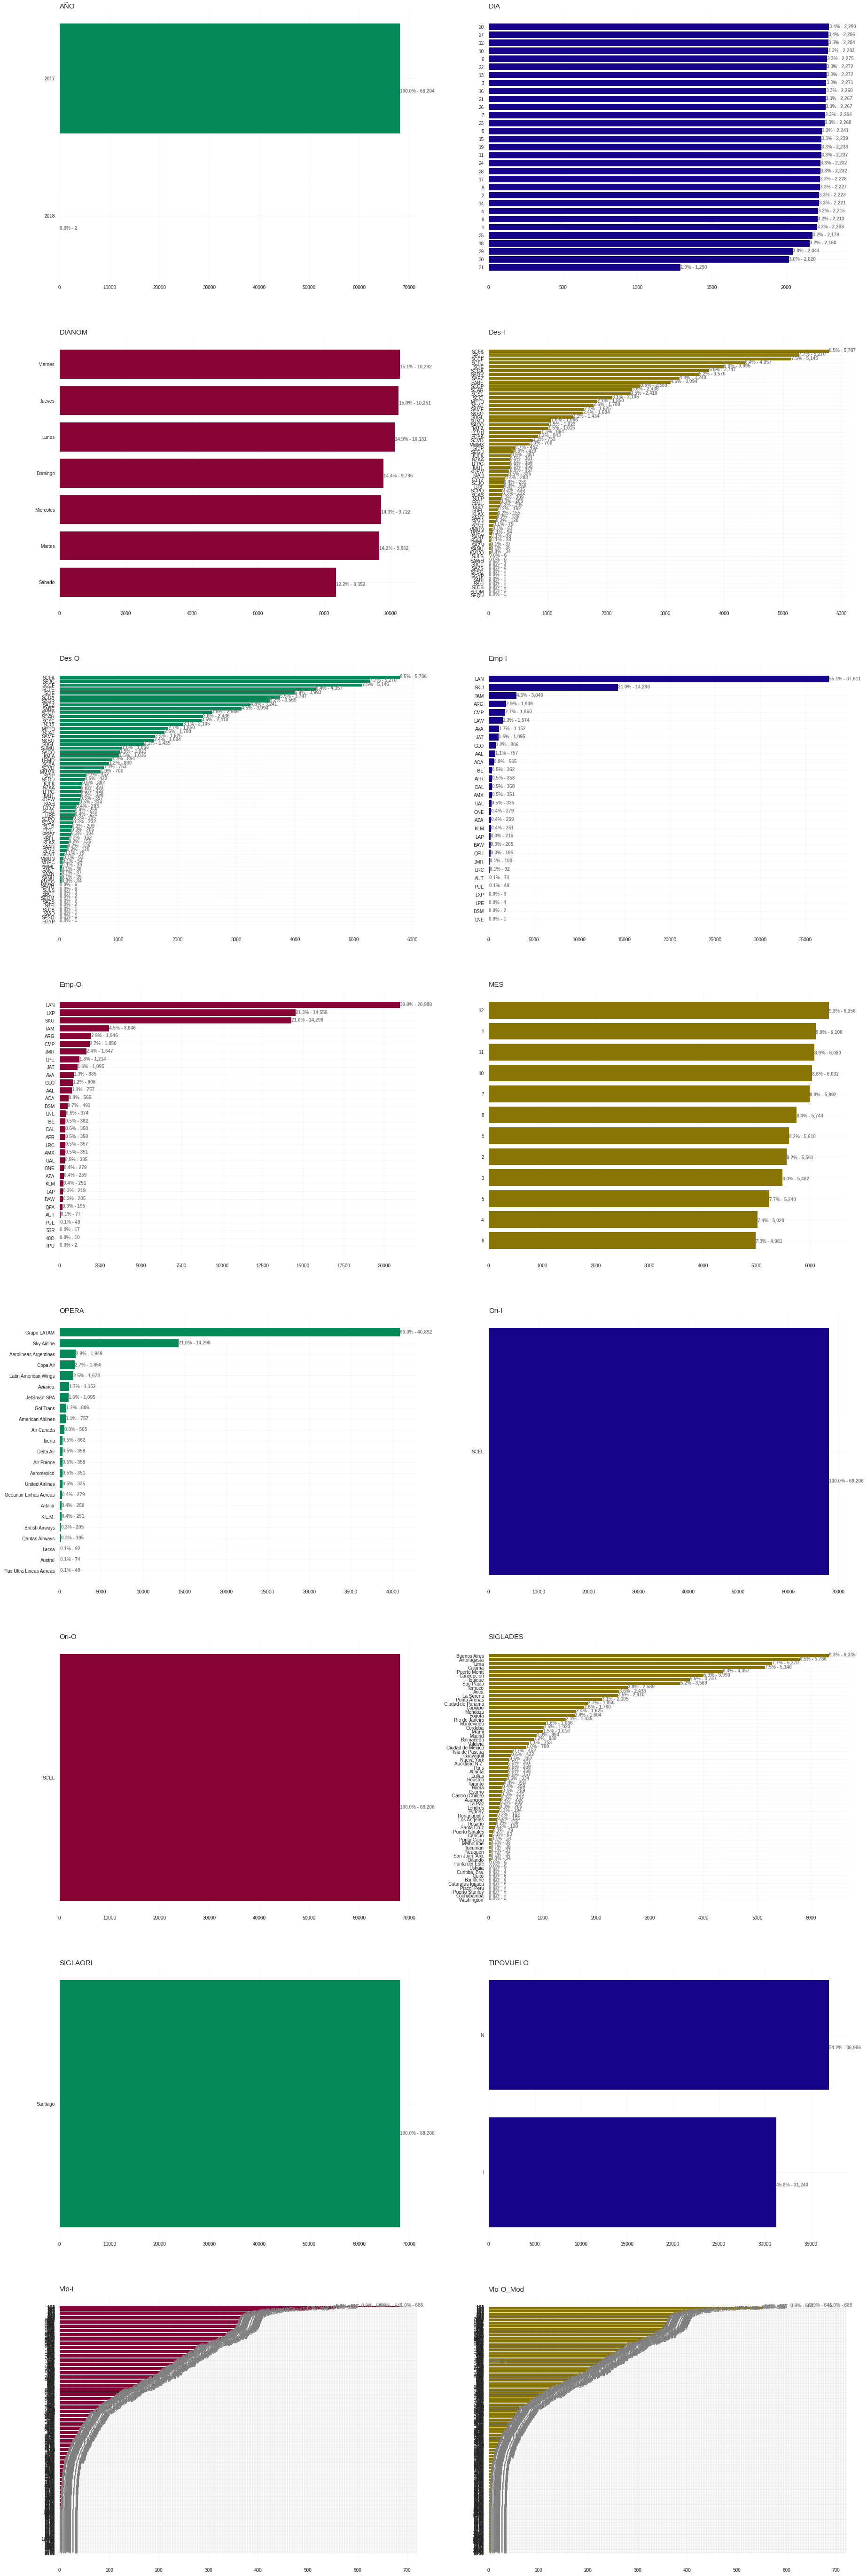

In [22]:
# Seleccionamos las columnas que deseamos visualizar
columnas_grafico = np.setdiff1d(datos.columns.to_list(),['Fecha-I','Fecha-O','Vlo-O','Vlo-O-2'])

values_color = ['#048957','#150489','#890436','#897504']*4

# Tamaño de la figura
fig, ax = plt.subplots(nrows = 8, ncols=2,figsize =(30, 100))
ax = ax.flatten() 

for i in range(len(columnas_grafico)):

  tab_freq = datos.groupby([columnas_grafico[i]]).size().reset_index(name='Frecuencia').sort_values(by = 'Frecuencia', ascending=False)
  total = tab_freq['Frecuencia'].sum()

  # Gráfico de barras
  ax[i].barh(tab_freq[columnas_grafico[i]].astype(str),tab_freq['Frecuencia'],color=values_color[i])

  # Eliminar axes splines
  for s in ['top', 'bottom', 'left', 'right']:
    ax[i].spines[s].set_visible(False)
  
  # Eliminar x, y ticks
  ax[i].xaxis.set_ticks_position('none')
  ax[i].yaxis.set_ticks_position('none')

  # Agregar espacio entre ejes y etiquetas
  ax[i].xaxis.set_tick_params(pad = 5)
  ax[i].yaxis.set_tick_params(pad = 10)

  # Agregar x, y gridlines
  ax[i].grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
  
  # Invertir el eje y
  ax[i].invert_yaxis()
  
  # Add annotation to bars
  for x,y in zip(ax[i].patches,tab_freq['Frecuencia'].values):
      ax[i].text(x.get_width()+0.2, x.get_y()+0.5,
              '{:.1f}% - {:,}'.format(100*round((x.get_width()/total),3),int(y)),
              fontsize = 10, fontweight ='bold',
              color ='grey')
      
  # Add Plot Title
  ax[i].set_title(columnas_grafico[i],
             loc ='left',fontsize = 15)
 
# Mostrar gráfico
plt.show()



---


>Se observa que:
>
>*   Las variables `AÑO`, `Ori-I`, `Ori-O` y `SIGLAORI` el 100% de sus valores se concentran en una categoría o valor. Al no tener variabilidad, estas variables **se descartan** para cualquier modelo.
>*   La cantidad de vuelos acumulados son aproximadamente iguales, salvo los últimos días de mes (29, 30 y 31) que se reducen, especialmente los días 31, debido a que hay pocos meses con 31 días. 
>*   La cantidad de vuelos acumulados es menor los sábados. 
>*   El mes de junio es que menos cantidad de vuelos acumulados tiene.
>*   El 81% de los vuelos es operado por el grupo LATAM (60%) y Sky Airline (21%).
>*   Las 3 ciudades de destino con más vuelos son *Buenos Aires*, *Antofagasta* y *Lima*.
>*   Hay una proporción de cantidad de vuelos similar entre nacionales (54%) e internacionales (46%).


---



Volvemos a realizar los gráficos, pero calculando el promedio diario de vuelo, ya que la distribución graficada anteriormente nos da el acumulado de registros.



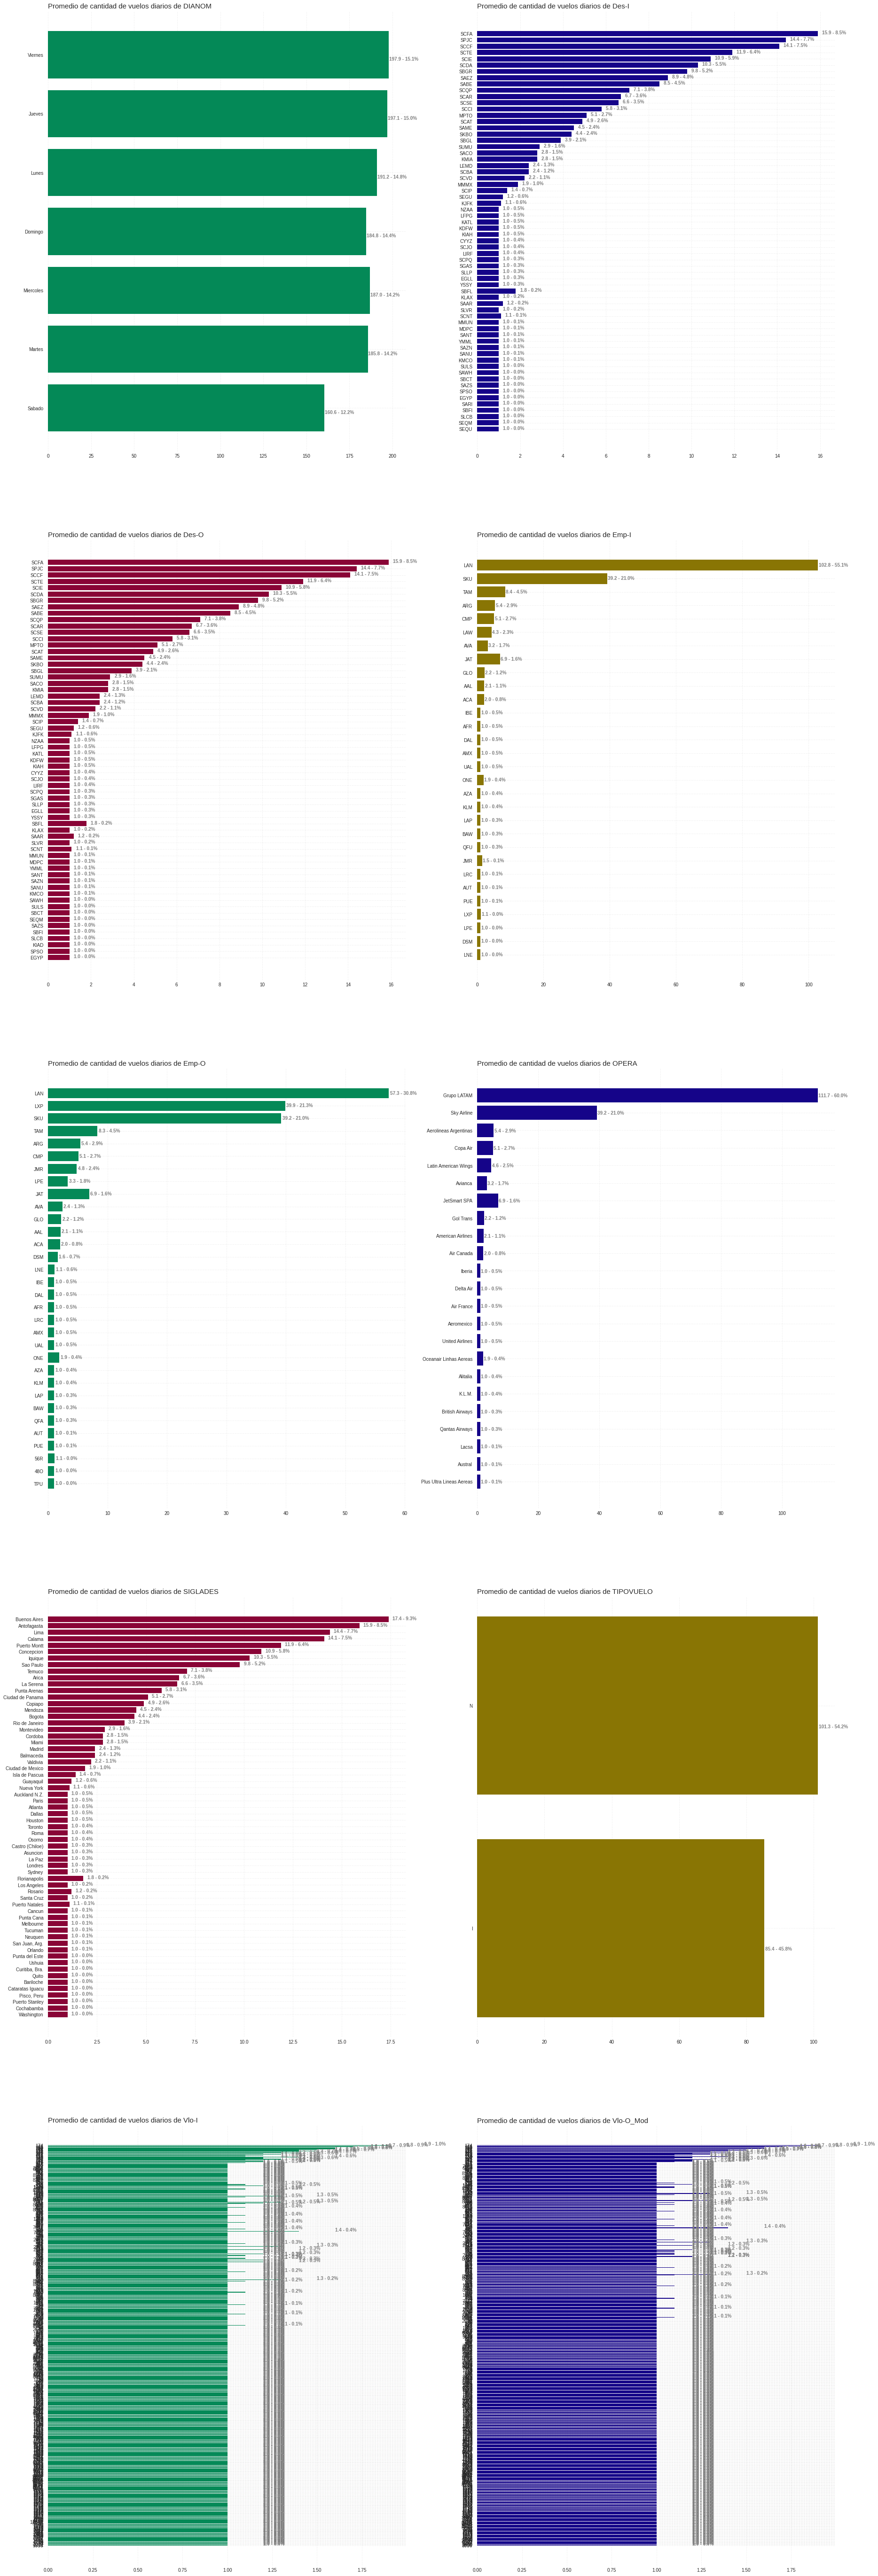

In [23]:
# Seleccionamos las columnas que deseamos visualizar, quitando las que solo tienen un solo valor o categoría
columnas_grafico_r = np.setdiff1d(columnas_grafico,['DIA','MES','AÑO','Ori-I','Ori-O','SIGLAORI'])

values_color = ['#048957','#150489','#890436','#897504']*4

# Tamaño de la figura
fig, ax = plt.subplots(nrows = 5, ncols=2,figsize =(30, 100))
ax = ax.flatten() 

for i in range(len(columnas_grafico_r)):

  tabla_diaria = datos.groupby(['DIA','MES','AÑO']+[columnas_grafico_r[i]]).size().reset_index(name='mean').sort_values(by = 'mean')
  tabla_agg = tabla_diaria[[columnas_grafico_r[i]]+['mean']].groupby([columnas_grafico_r[i]]).agg(['mean','sum']).reset_index(col_level=1).round(1)
  tabla_agg.columns = tabla_agg.columns.to_flat_index().map(lambda x: x[1])
  tabla_agg = tabla_agg.sort_values(by = 'sum', ascending=False)
  total = tabla_agg['sum'].sum()
  
  # Gráfico de barras
  ax[i].barh(tabla_agg[columnas_grafico_r[i]].astype(str),tabla_agg['mean'],color=values_color[i])

  # Eliminar axes splines
  for s in ['top', 'bottom', 'left', 'right']:
    ax[i].spines[s].set_visible(False)
  
  # Eliminar x, y ticks
  ax[i].xaxis.set_ticks_position('none')
  ax[i].yaxis.set_ticks_position('none')

  # Agregar espacio entre ejes y etiquetas
  ax[i].xaxis.set_tick_params(pad = 5)
  ax[i].yaxis.set_tick_params(pad = 10)

  # Agregar x, y gridlines
  ax[i].grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
  
  # Invertir el eje y
  ax[i].invert_yaxis()
  
  # Add annotation to bars
  for x,y in zip(ax[i].patches,tabla_agg['sum'].values):
      ax[i].text(x.get_width()+0.2, x.get_y()+0.5,
              '{} - {:.1f}%'.format(x.get_width(),round(100*y/total,2)),
              fontsize = 10, fontweight ='bold',
              color ='grey')
      
  # Add Plot Title
  ax[i].set_title('Promedio de cantidad de vuelos diarios de '+columnas_grafico_r[i],
             loc ='left',fontsize = 15)
 
# Mostrar gráfico
plt.show()



---


>Se construyeron los promedios de vuelos diarios, además de la representatividad (% de registros del total), para revisar sus diferencias y si cambia el orden. 
>
>*   Hay una relación directa entre el promedio de vuelos diarios por cada variable, con el total de registros. 


---



# 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv



*   `temporada_alta`


In [24]:
datos['temporada_alta'] = np.where((datos['Fecha-I'] >= '2017-12-15') & (datos['Fecha-I'] <= '2017-12-31') |
                                  (datos['Fecha-I'] >= '2017-09-11') & (datos['Fecha-I'] <= '2017-09-30') |
                                  (datos['Fecha-I'] >= '2017-07-15') & (datos['Fecha-I'] <= '2017-07-31') |
                                  (datos['Fecha-I'] >= '2017-01-01') & (datos['Fecha-I'] <= '2017-03-03') , 1, 0)

*   `dif_min`

In [25]:
datos['dif_min'] = (datos['Fecha-O'] - datos['Fecha-I'])/ pd.Timedelta(minutes=1)

*   `atraso_15`

In [26]:
datos['atraso_15'] = np.where(datos['dif_min'] > 15, 1, 0)

*   `periodo_dia`

In [27]:
datos['periodo_dia'] = np.where((datos['Fecha-I'].dt.hour>=5) & (datos['Fecha-I'].dt.hour<12),'mañana',np.where((datos['Fecha-I'].dt.hour>=12) & (datos['Fecha-I'].dt.hour<19),'tarde','noche'))

Exportamos los datos a un archivo csv con el nombre de `synthetic_features`.

In [28]:
datos[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv')

# 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?



*   Tasa de atraso por destino



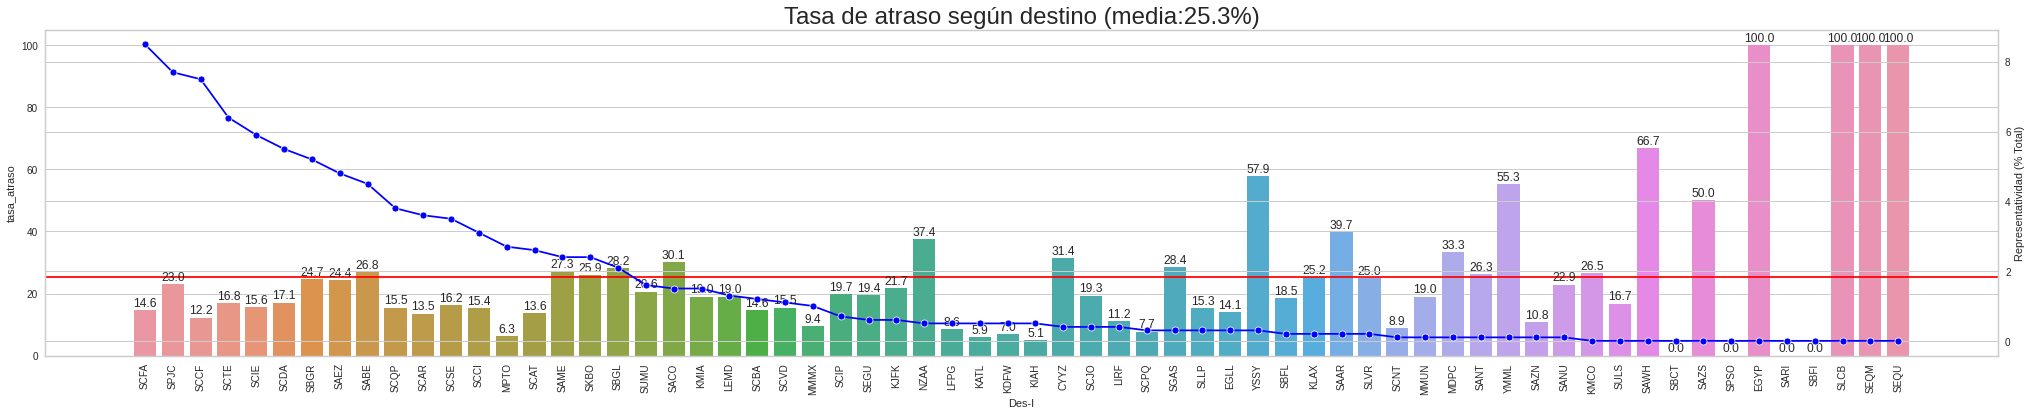

In [29]:
import seaborn as sns
data_graf = datos[['Des-I','atraso_15']].groupby(['Des-I']).agg({'sum','count'}).reset_index(col_level=1)
data_graf.columns = data_graf.columns.to_flat_index().map(lambda x: x[1])
data_graf['tasa_atraso'] = (100*data_graf['sum']/data_graf['count']).round(1)
data_graf = data_graf.sort_values(by='count', ascending=False)

total_rep = data_graf['count'].sum()

fig, ax = plt.subplots(figsize=(35, 6))

graph = sns.barplot(data_graf['Des-I'],data_graf['tasa_atraso'], ax=ax)
plt.xticks(rotation=90)
graph.axhline(data_graf['tasa_atraso'].mean(), color='red')
ax.set_title('Tasa de atraso según destino (media:'+str(round(data_graf['tasa_atraso'].mean(),1))+'%)',size=24)
ax2 = ax.twinx()
sns.lineplot(data_graf['Des-I'],100*round(data_graf['count']/total_rep,3), marker='o', sort = True, ax=ax2, color='blue')
plt.ylabel('Representatividad (% Total)')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')


*   Tasa de atraso por aerolínea

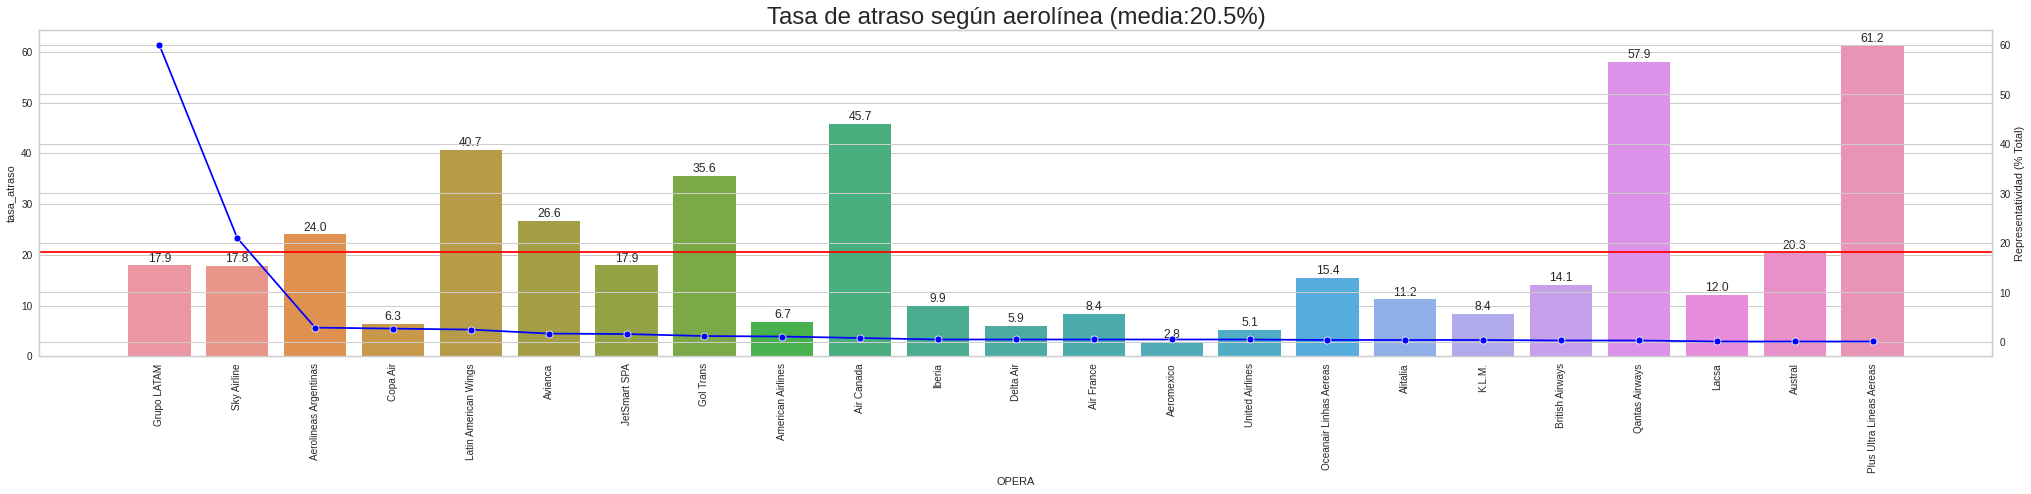

In [30]:
data_graf = datos[['OPERA','atraso_15']].groupby(['OPERA']).agg({'sum','count'}).reset_index(col_level=1)
data_graf.columns = data_graf.columns.to_flat_index().map(lambda x: x[1])
data_graf['tasa_atraso'] = (100*data_graf['sum']/data_graf['count']).round(1)
data_graf = data_graf.sort_values(by='count', ascending=False)

total_rep = data_graf['count'].sum()

fig, ax = plt.subplots(figsize=(35, 6))

graph = sns.barplot(data_graf['OPERA'],data_graf['tasa_atraso'], ax=ax)
plt.xticks(rotation=90)
graph.axhline(data_graf['tasa_atraso'].mean(), color='red')
ax.set_title('Tasa de atraso según aerolínea (media:'+str(round(data_graf['tasa_atraso'].mean(),1))+'%)',size=24)
ax2 = ax.twinx()
sns.lineplot(data_graf['OPERA'],100*round(data_graf['count']/total_rep,3), marker='o', sort = True, ax=ax2, color='blue')
plt.ylabel('Representatividad (% Total)')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')

*   Tasa de atraso por mes

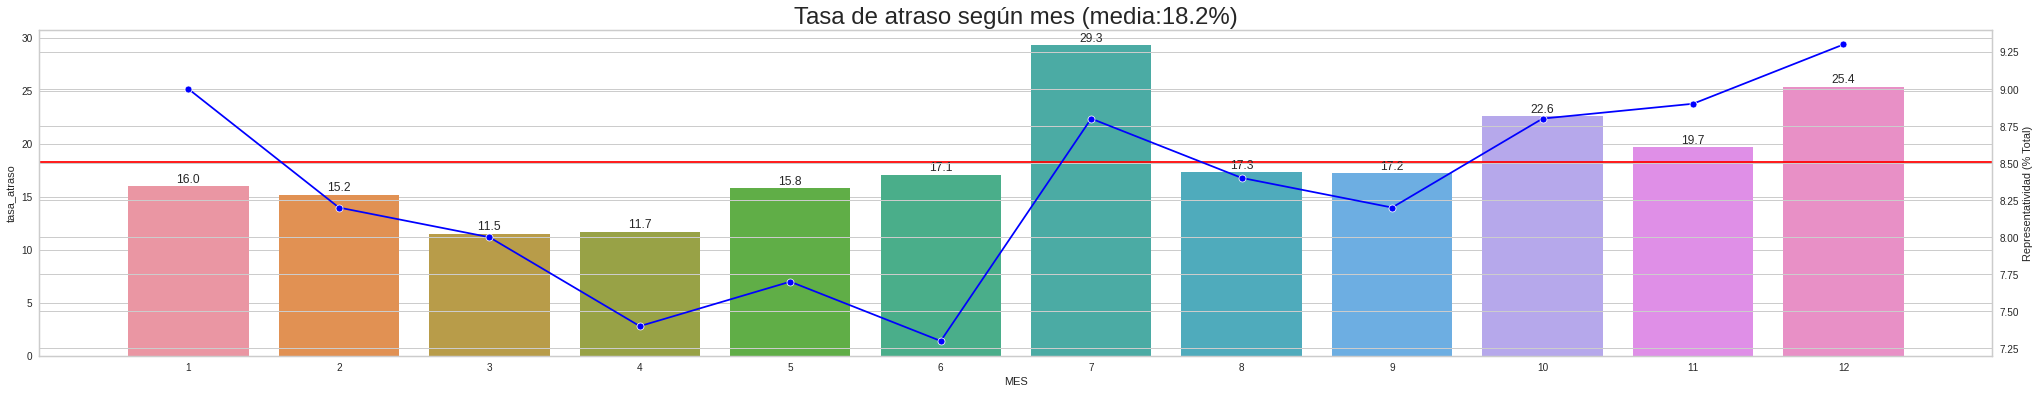

In [31]:
data_graf = datos[['MES','atraso_15']].groupby(['MES']).agg({'sum','count'}).reset_index(col_level=1)
data_graf.columns = data_graf.columns.to_flat_index().map(lambda x: x[1])
data_graf['tasa_atraso'] = (100*data_graf['sum']/data_graf['count']).round(1)
data_graf = data_graf.sort_values(by='MES', ascending=True)

total_rep = data_graf['count'].sum()

fig, ax = plt.subplots(figsize=(35, 6))

graph = sns.barplot(data_graf['MES'],data_graf['tasa_atraso'], ax=ax)
#plt.xticks(rotation=90)
graph.axhline(data_graf['tasa_atraso'].mean(), color='red')
ax.set_title('Tasa de atraso según mes (media:'+str(round(data_graf['tasa_atraso'].mean(),1))+'%)',size=24)
ax2 = ax.twinx()
sns.lineplot(ax.get_xticks(),100*round(data_graf['count']/total_rep,3), marker='o', sort = True, ax=ax2, color='blue')
plt.ylabel('Representatividad (% Total)')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')



*   Tasa de atraso según día de semana



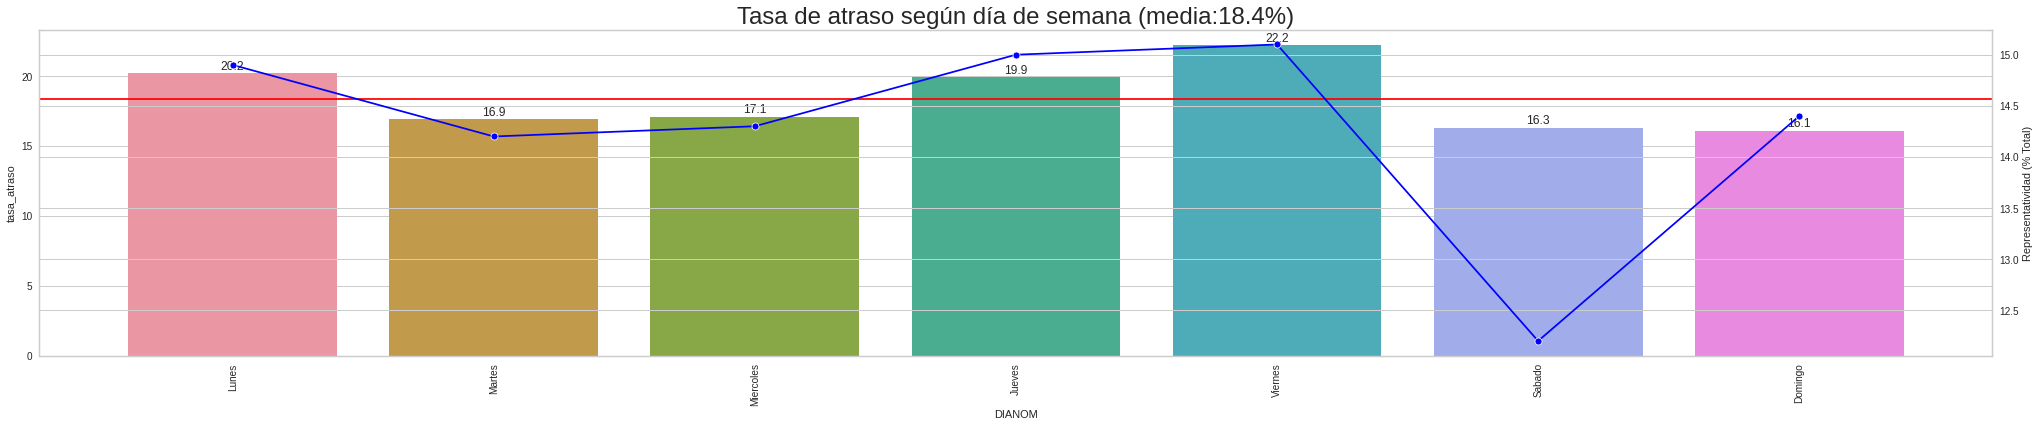

In [32]:
data_graf = datos[['DIANOM','atraso_15']].groupby(['DIANOM']).agg({'sum','count'}).reset_index(col_level=1)
data_graf.columns = data_graf.columns.to_flat_index().map(lambda x: x[1])
data_graf['tasa_atraso'] = (100*data_graf['sum']/data_graf['count']).round(1)
data_graf = data_graf.sort_values(by='count', ascending=False)
data_graf['DIANOM'] = pd.Categorical(data_graf['DIANOM'], ordered=True, categories=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'])

total_rep = data_graf['count'].sum()

fig, ax = plt.subplots(figsize=(35, 6))

graph = sns.barplot(data_graf['DIANOM'],data_graf['tasa_atraso'], ax=ax)
plt.xticks(rotation=90)
graph.axhline(data_graf['tasa_atraso'].mean(), color='red')
ax.set_title('Tasa de atraso según día de semana (media:'+str(round(data_graf['tasa_atraso'].mean(),1))+'%)',size=24)
ax2 = ax.twinx()
sns.lineplot(data_graf['DIANOM'],100*round(data_graf['count']/total_rep,3), marker='o', sort = True, ax=ax2, color='blue')
plt.ylabel('Representatividad (% Total)')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')


*   Tasa de atraso según temporada

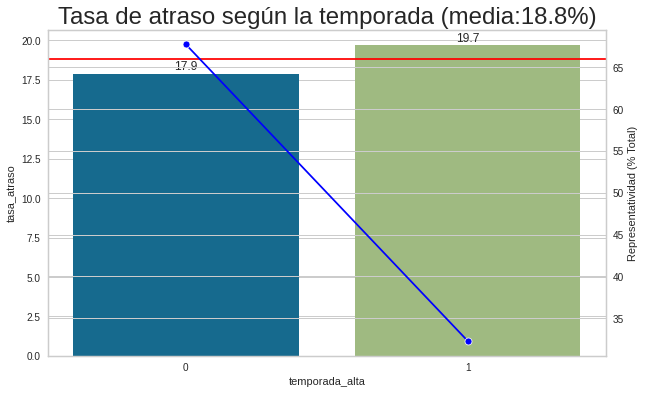

In [33]:
data_graf = datos[['temporada_alta','atraso_15']].groupby(['temporada_alta']).agg({'sum','count'}).reset_index(col_level=1)
data_graf.columns = data_graf.columns.to_flat_index().map(lambda x: x[1])
data_graf['tasa_atraso'] = (100*data_graf['sum']/data_graf['count']).round(1)
data_graf = data_graf.sort_values(by='count', ascending=False)

total_rep = data_graf['count'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

graph = sns.barplot(data_graf['temporada_alta'],data_graf['tasa_atraso'], ax=ax)
#plt.xticks(rotation=90)
graph.axhline(data_graf['tasa_atraso'].mean(), color='red')
ax.set_title('Tasa de atraso según la temporada (media:'+str(round(data_graf['tasa_atraso'].mean(),1))+'%)',size=24)
ax2 = ax.twinx()
sns.lineplot(data_graf['temporada_alta'],100*round(data_graf['count']/total_rep,3), marker='o', sort = True, ax=ax2, color='blue')
plt.ylabel('Representatividad (% Total)')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')


*   Tasa de atraso según tipo de vuelo

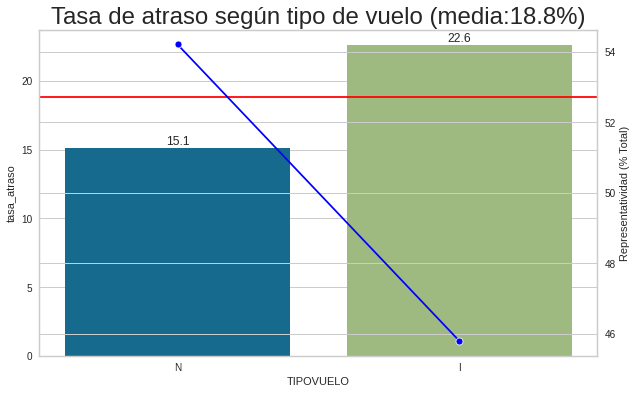

In [34]:
data_graf = datos[['TIPOVUELO','atraso_15']].groupby(['TIPOVUELO']).agg({'sum','count'}).reset_index(col_level=1)
data_graf.columns = data_graf.columns.to_flat_index().map(lambda x: x[1])
data_graf['tasa_atraso'] = (100*data_graf['sum']/data_graf['count']).round(1)
data_graf = data_graf.sort_values(by='count', ascending=False)

total_rep = data_graf['count'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

graph = sns.barplot(data_graf['TIPOVUELO'],data_graf['tasa_atraso'], ax=ax)
#plt.xticks(rotation=90)
graph.axhline(data_graf['tasa_atraso'].mean(), color='red')
ax.set_title('Tasa de atraso según tipo de vuelo (media:'+str(round(data_graf['tasa_atraso'].mean(),1))+'%)',size=24)
ax2 = ax.twinx()
sns.lineplot(data_graf['TIPOVUELO'],100*round(data_graf['count']/total_rep,3), marker='o', sort = True, ax=ax2, color='blue')
plt.ylabel('Representatividad (% Total)')

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 7), textcoords='offset points')



---


>Se construyeron gráficos de barras para mostrar la tasa de atraso, indicando la media de esa tasa en una línea horizontal de color rojo y en el eje secundario se muestra la representatividad (% registros respecto del total) con una línea azul:
>
>*   La variable `destino` tiene cierta capacidad explicativa, pues se observa variabilidad en la tasa de retraso.
>*   La variable `aerolínea` parece tener cierta capacidad explicativa, pero la variabilidad solo se concentra sobre valores que no tienen mucha representatividad. Observando la tasa de las dos principales aerolíneas, que concentran el 81% de los datos, son similares, por lo que es probable que esta variable no sea significativa para explicar el atraso.
>*   La variable `mes` parece ser significativa, pues la tasa de retraso  registró un alza en julio y diciembre. Esta variable puede ser proxy, pues en julio del 2017 hubo un friaje atípico en Santiago. El alza de la tasa en diciembre puede ser explicado por las festividades navideñas y de año nuevo.
>*   La variable `día de semana` parece ser explicativa, pues la tasa es baja en sábado y domingo, mientras que las más altas son los viernes y lunes.
>*   La variable `temporada alta` no parece ser explicativa pues sus valores tienen una tasa muy parecida.
>*   La variable `tipo de vuelo` parece ser explicativa pues existe una diferencia importante entre las tasas de atraso entre vuelos internacionales y nacionales.

Finalmente, se puede decir a priori que las variables que explican el atraso son **destino, mes, día de semana y tipo de vuelo**, donde el mes puede ser una variable proxy debido a que posee información del clima (friaje anómalo de julio del 2017).

**Observación:** ***La variable más importante para explicar el atraso es el clima, pero es una variable que no se pudo obtener de registros públicos climatológicos de Chile, en el 2017.***


---



# 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

Obtenemos el dataframe con las variables independientes candidatas y el target:

In [35]:
datos_model = datos[['Des-I','MES','DIANOM','TIPOVUELO','OPERA','periodo_dia','temporada_alta','atraso_15']]
datos_model

Des-I  MES     DIANOM TIPOVUELO              OPERA periodo_dia  \
0      KMIA    1    Domingo         I  American Airlines       noche   
1      KMIA    1      Lunes         I  American Airlines       noche   
2      KMIA    1     Martes         I  American Airlines       noche   
3      KMIA    1  Miercoles         I  American Airlines       noche   
4      KMIA    1     Jueves         I  American Airlines       noche   
...     ...  ...        ...       ...                ...         ...   
68201  SPJC   12    Viernes         I       JetSmart SPA       tarde   
68202  SPJC   12      Lunes         I       JetSmart SPA       tarde   
68203  SPJC   12  Miercoles         I       JetSmart SPA       tarde   
68204  SPJC   12    Viernes         I       JetSmart SPA       tarde   
68205  SPJC   12    Domingo         I       JetSmart SPA       tarde   

       temporada_alta  atraso_15  
0                   1          0  
1                   1          0  
2                   1          0  
3                   1          0  
4                   1          0  
...               ...        ...  
68201               1          1  
68202               1          1  
68203               1          1  
68204               1          0  
68205               0          0  

[68206 rows x 8 columns]

Seleccionamos las variables independientes que entran al modelo:

In [36]:
col_model = ['Des-I','MES','DIANOM','TIPOVUELO','OPERA','periodo_dia','temporada_alta']
col_model

['Des-I',
 'MES',
 'DIANOM',
 'TIPOVUELO',
 'OPERA',
 'periodo_dia',
 'temporada_alta']

---


>Hacemos la competencia de modelos, usando datos de entrenamiento y de test, y en el entrenamiento usamos cross validation con 10 k-folds. Corregimos el desbalance del target con SMOTE, se corrige la alta cardinalidad de las variables categóricas y el modelo realiza la selección de variables usando técnicas de permutación. 


---

In [37]:
model_f1 = setup(data = datos_model, target ='atraso_15', session_id=123, train_size = 0.75, 
                 fold_shuffle=True, fix_imbalance = True, categorical_features = col_model,combine_rare_levels = True, feature_selection = True)

Description             Value
0                               session_id               123
1                                   Target         atraso_15
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data        (68206, 8)
5                           Missing Values             False
6                         Numeric Features                 0
7                     Categorical Features                 7
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (51154, 85)
12                    Transformed Test Set       (17052, 85)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              edf0
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels              True
38                    Rare Level Threshold               0.1
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection              True
53                Feature Selection Method           classic
54            Features Selection Threshold               0.8
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance              True
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Des-I', 'MES',
                                                            'DIANOM',
                                                            'TIPOVUELO',
                                                            'OPERA',
                                                            'periodo_dia',
                                                            'temporada_alta'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='atraso_15',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer

Luego, se comparan los modelos que compiten.

In [38]:
compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
dummy                    Dummy Classifier    0.8149  0.5000  0.0000  0.0000   
lightgbm  Light Gradient Boosting Machine    0.8054  0.7032  0.2389  0.4528   
et                 Extra Trees Classifier    0.7679  0.6060  0.2407  0.3277   
dt               Decision Tree Classifier    0.7653  0.6002  0.2415  0.3219   
rf               Random Forest Classifier    0.7566  0.6328  0.2839  0.3220   
gbc          Gradient Boosting Classifier    0.7293  0.6784  0.4181  0.3223   
knn                K Neighbors Classifier    0.6828  0.6242  0.4408  0.2766   
ada                  Ada Boost Classifier    0.6625  0.6612  0.5286  0.2813   
svm                   SVM - Linear Kernel    0.6602  0.0000  0.5690  0.2888   
lda          Linear Discriminant Analysis    0.6414  0.6737  0.6007  0.2810   
ridge                    Ridge Classifier    0.6413  0.0000  0.6007  0.2809   
lr                    Logistic Regression    0.6404  0.6741  0.6015  0.2805   
nb                            Naive Bayes    0.4974  0.6421  0.7259  0.2321   
qda       Quadratic Discriminant Analysis    0.1851  0.5000  1.0000  0.1851   

              F1   Kappa     MCC  TT (Sec)  
dummy     0.0000  0.0000  0.0000    12.338  
lightgbm  0.3125  0.2116  0.2264    14.162  
et        0.2775  0.1430  0.1455    38.785  
dt        0.2759  0.1392  0.1413    13.274  
rf        0.3017  0.1551  0.1555    30.008  
gbc       0.3639  0.1957  0.1984    27.641  
knn       0.3398  0.1453  0.1522   133.910  
ada       0.3671  0.1654  0.1807    16.108  
svm       0.3825  0.1818  0.2021    13.259  
lda       0.3829  0.1746  0.1997    13.911  
ridge     0.3828  0.1745  0.1996    12.364  
lr        0.3825  0.1739  0.1991    16.837  
nb        0.3482  0.0956  0.1382    12.397  
qda       0.3124  0.0000  0.0000    13.262

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DummyClassifier(constant=None, random_state=123, strategy='prior')
INFO:logs:compare_models() succesfully completed......................................


DummyClassifier(constant=None, random_state=123, strategy='prior')

Optimizamos el modelo ganador (según Accuracy, AUC, Recall respectivamente).

In [39]:
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8106  0.7011  0.2703  0.4794  0.3457  0.2449  0.2587
1       0.8012  0.7042  0.2186  0.4277  0.2893  0.1876  0.2019
2       0.8000  0.6983  0.2313  0.4261  0.2998  0.1949  0.2073
3       0.8016  0.6954  0.2278  0.4329  0.2985  0.1958  0.2095
4       0.8133  0.7157  0.2418  0.4914  0.3241  0.2301  0.2496
5       0.7959  0.6855  0.2524  0.4157  0.3141  0.2025  0.2112
6       0.8023  0.7002  0.2344  0.4370  0.3052  0.2020  0.2153
7       0.8066  0.7143  0.2429  0.4582  0.3175  0.2170  0.2319
8       0.8049  0.6900  0.2239  0.4463  0.2982  0.1991  0.2151
9       0.8172  0.7276  0.2460  0.5132  0.3326  0.2416  0.2636
Mean    0.8054  0.7032  0.2389  0.4528  0.3125  0.2116  0.2264
Std     0.0063  0.0121  0.0144  0.0305  0.0168  0.0195  0.0217

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


Se obtiene el umbral de probabilidad óptimo.

In [40]:
optimize_threshold(lightgbm)

INFO:logs:Initializing optimize_threshold()
INFO:logs:optimize_threshold(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), optimize=Accuracy, grid_interval=0.1, return_data=False, plot_kwargs=None)
INFO:logs:Importing libraries
INFO:logs:Checking exceptions
INFO:logs:defining variables
INFO:logs:starting optimization loop
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=

INFO:logs:returning model with best metric
INFO:logs:optimize_threshold() succesfully completed......................................


CustomProbabilityThresholdClassifier(boosting_type='gbdt', class_weight=None,
                                     classifier=LGBMClassifier(boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                                                               min_child_weight=0.001,
                                                               min_split_gain=0.0,
                                                               n_estimators=100,
                                                               n_jobs=-1,
             

Observamos que nos recomienda el umbral de probabilidad en 0.6, pero observamos que hay un recall muy bajo. Se observa un recall alto en el umbral de probabilidad igual a 0.3, por lo que volvemos a entrenar el modelo sobre ese umbral.

In [50]:
lightgbm_theshold = create_model('lightgbm', boosting_type='gbdt',class_weight=None,colsample_bytree=1.0,
                                 importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None,
                                     probability_threshold=0.3,
                                     random_state=123, reg_alpha=0.0,
                                     reg_lambda=0.0, silent='warn',
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6284  0.7011  0.6790  0.2871  0.4035  0.1937  0.2317
1       0.6179  0.7042  0.7022  0.2844  0.4049  0.1920  0.2346
2       0.6226  0.6983  0.6621  0.2802  0.3937  0.1806  0.2158
3       0.6118  0.6954  0.6635  0.2740  0.3878  0.1701  0.2059
4       0.6268  0.7157  0.6811  0.2864  0.4033  0.1929  0.2312
5       0.6063  0.6855  0.6800  0.2735  0.3901  0.1712  0.2100
6       0.6194  0.7002  0.6653  0.2788  0.3929  0.1785  0.2144
7       0.6371  0.7143  0.7022  0.2970  0.4175  0.2125  0.2541
8       0.6162  0.6900  0.6674  0.2772  0.3917  0.1762  0.2125
9       0.6344  0.7276  0.7149  0.2973  0.4200  0.2146  0.2587
Mean    0.6221  0.7032  0.6818  0.2836  0.4005  0.1882  0.2269
Std     0.0093  0.0121  0.0177  0.0081  0.0107  0.0151  0.0175

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 18
INFO:logs:CustomProbabilityThresholdClassifier(boosting_type='gbdt', class_weight=None,
                                     classifier=LGBMClassifier(boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                                                               min_child_weight=0.001,
                                                               min_split_gain=0.0,
                                                    

Se optimiza el modelo enfocado en la métrica de *recall* con el modelo en el umbral de probabilidad optimizado.




In [51]:
tuned_lightgbm = tune_model(lightgbm_theshold, optimize='Recall')

Accuracy     AUC  Recall   Prec.      F1  Kappa  MCC
Fold                                                      
0       0.1851  0.6913     1.0  0.1851  0.3124    0.0  0.0
1       0.1851  0.6828     1.0  0.1851  0.3124    0.0  0.0
2       0.1851  0.6833     1.0  0.1851  0.3124    0.0  0.0
3       0.1853  0.6766     1.0  0.1853  0.3127    0.0  0.0
4       0.1851  0.6967     1.0  0.1851  0.3124    0.0  0.0
5       0.1851  0.6766     1.0  0.1851  0.3124    0.0  0.0
6       0.1851  0.6756     1.0  0.1851  0.3124    0.0  0.0
7       0.1851  0.6923     1.0  0.1851  0.3124    0.0  0.0
8       0.1851  0.6736     1.0  0.1851  0.3124    0.0  0.0
9       0.1851  0.7081     1.0  0.1851  0.3124    0.0  0.0
Mean    0.1851  0.6857     1.0  0.1851  0.3124    0.0  0.0
Std     0.0001  0.0106     0.0  0.0001  0.0001    0.0  0.0

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:CustomProbabilityThresholdClassifier(bagging_fraction=0.5, bagging_freq=0,
                                     boosting_type='gbdt', class_weight=None,
                                     classifier=LGBMClassifier(bagging_fraction=0.5,
                                                               bagging_freq=0,
                                                               boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               feature_fraction=0.9,
                                                               importance_type='split',
                                                               learning_rate=1e-07,
                                                          

Observamos que el modelo optimizado ha llevado a 1 el recall pero pierde accuracy, es decir, sobre aprende enfocado en predecir los atrasos (etiqueta a todos los valores como 1).

Por lo tanto, usaremos el modelo anterior.

In [61]:
pickle.dump(lightgbm_theshold, open('lightgbm_theshold.pkl', 'wb'))

Obtenemos la importancia de cada variable:

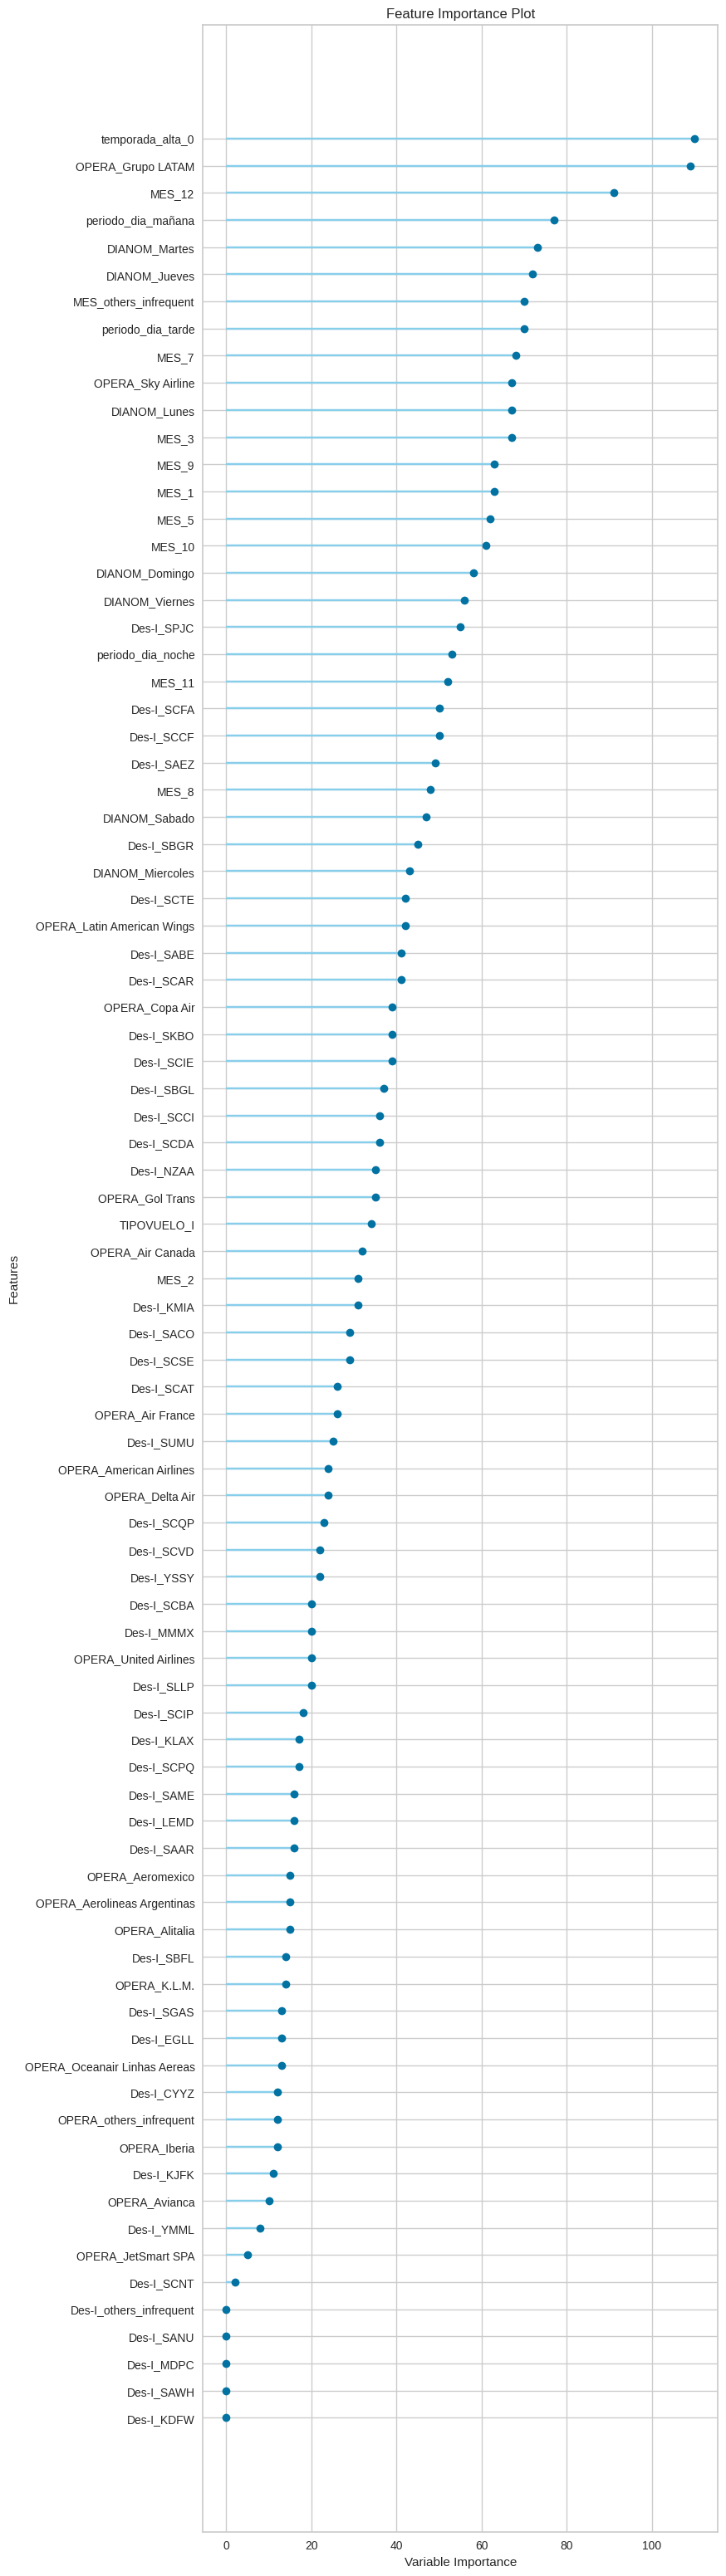

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [63]:
plot_model(lightgbm_theshold, plot = 'feature_all')

Cargamos el modelo guardado.

In [64]:
pickled_model = pickle.load(open('lightgbm_theshold.pkl', 'rb'))

Obtenemos el dataset de test:

In [65]:
X_test = get_config(variable="X_test")
X_test = pd.DataFrame(X_test)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_test)
INFO:logs:Global variable: X_test returned as        Des-I_KDFW  OPERA_Oceanair Linhas Aereas  MES_10  Des-I_YMML  \
31175         0.0                           0.0     0.0         0.0   
15962         0.0                           0.0     0.0         0.0   
41409         0.0                           0.0     0.0         0.0   
55786         0.0                           0.0     0.0         0.0   
31027         0.0                           0.0     0.0         0.0   
...           ...                           ...     ...         ...   
61138         0.0                           0.0     0.0         0.0   
28050         0.0                           0.0     0.0         0.0   
12900         0.0                           0.0     0.0         0.0   
32327         0.0                           0.0     0.0         0.0   
31902         0.0                           0.0     0.0         0.0   

       Des-I_SCBA  Des-I_SA

Usamos la técnica de *Interpretable Machine Learning* **Shap** para corroborar o identificar las variables explicativas del atraso de los vuelos.

In [66]:
explainer = shap.Explainer(pickled_model.predict, X_test)
sv = explainer(X_test)

Permutation explainer: 17053it [25:30, 11.07it/s]


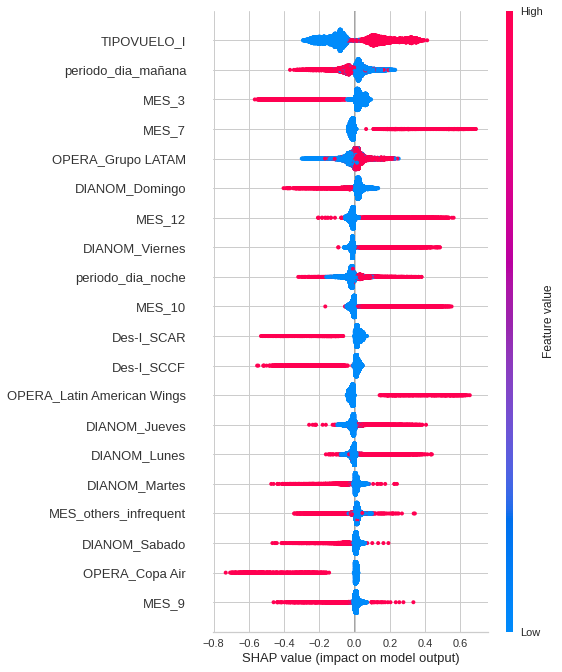

In [67]:
shap.summary_plot(sv, X_test)

# 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

---


>Para seleccionar el criterio con el que se evalúa el modelo es necesario establecer un criterio de costos. Existen dos costos asociados: (1) Asumir que un vuelo tendrá atraso cuando no lo tendrá; (2) Asumir que un vuelo no tendrá un atraso cuando sí lo tiene. **Se considera que los costos más altos se dan en el segundo caso**. 

>Por lo tanto, el falso negativo es la métrica con la que se evalúa el performance **principalmente**. Si bien no se cuenta con una métrica estándar para su optimización, se tiene el recall como un indicador complementario, por lo que buscar que no haya casos de falsos negativos (tender a cero) es lo mismo que buscar que el recall tienda a 1.

>Se selecciona el algoritmo **Light Gradient Boosting Machine**	porque su entrenamiento es más rápido, usa menos memoria y brinda un performance adecuado como el **XGBoost**.

>Las 4 variables que más influyen, según la impureza de Gini, son:  
>
>*   Temporada **no** alta
>*   La aerolínea Latam
>*   Mes de diciembre.
>*   Periodo "mañana" (los vuelos que salen por la mañana)

>Se observa que cada una de ellas puede estar afectada por sobrerrepresentatividad como que el atraso se explica por la aerolínea Latam debido a que el 60% de los registros corresponden a esa categoría. 

>Para evaluar el efecto positivo o negativo de cada variable en la tasa de atraso, evaluamos también la influencia de variables a través del método de permutación.

Las variables que afectan negativamente, es decir, que reduce la tasa de atrasos, son:

>*   La operadora "Copa Air"
>*   Mes de marzo
>*   Los aeropuertos de destino codificados como SCAR y SCCF

Las variables que afectan positivamente, es decir, que aumenta la tasa de atrasos, son:

>*   Mes de julio (debido al friaje se tuvieron más atrasos), octubre y diciembre
>*   La operadora "Latin American Wings"
>*   Los días viernes.

>Se podría mejorar la performance agregando variables, especificamente los datos climatológicos, tanto de Santiago como el de las ciudades de los aeropuertos de destino. Esta variable se ve reflejada en el resultado de "mes de julio", que es cuando se registró un friaje anómalo en Santiago. 

---